In [341]:
import numpy
import pandas as pd
import numpy as np
import networkx as nx
from math import ceil
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [342]:
matches = [5, 16, 25]

In [343]:
for match in matches:
    print('No.', match)

    break

    num_period = list(pd.read_csv((short_base_path + ac_path).format(match)).index)

    for p in num_period:
        print("Period: ", p)
        print(get_tf(match, p))

No. 5


In [344]:
short_base_path = './results/short/match_{}/'
short_base_path_op = './results/short/opponent/match_{}/'

ac_path = 'AC.csv'
tf_path = 'period-{}-team_inf.csv'
long_link_path = 'LongPassingLink.csv'
tc_path = 'TC.csv'
ecd_path = 'ECD.csv'
nds_path = 'num_dist_shift.csv'
nt_path = 'num_types.csv'
clus_path = 'period-{}-clustering.csv'

In [345]:
tfds = []
llds = []
acds = []
tcds = []
ecdds = []
ndsds = []
ntds = []
clusds = []

data_1 = {
    'LEVtc':tfds,
    'Nlps':llds,
    'AlgeC':acds,
}

data_2 = {
    'Netc':tcds,
    'ECD':ecdds,
}

data_3 = {
    'Dpd':ndsds,
    'Dpt':ntds,
}

data_4 = {
    'ClusC':clusds,
}

datas = [data_1, data_2, data_3, data_4]

for match in matches:

    print('No.', match)

    # Figure 1
    tfd = []

    num_period = list(pd.read_csv((short_base_path + ac_path).format(match)).index)
    
    for p in num_period:
        tfd.append(get_tf(match, p))

    lld = list(pd.read_csv((short_base_path + long_link_path).format(match))['num of long passing link'])
    acd = list(pd.read_csv((short_base_path + ac_path).format(match))['AC'])

    tfds.append(tfd)
    llds.append(lld)
    acds.append(acd)

    # Figure 2
    tcd = list(pd.read_csv((short_base_path + tc_path).format(match))['num of TC'])
    tcds.append(tcd)

    ecdd = list(pd.read_csv((short_base_path + ecd_path).format(match))['ECD'])
    ecdds.append(ecdd)

    # Figure 3
    ndsd = list(pd.read_csv((short_base_path + nds_path).format(match))['num_dist_shift'])
    ndsds.append(ndsd)

    ntd = list(pd.read_csv((short_base_path + nt_path).format(match))['num_types'])
    ntds.append(ntd)

    # Figure 4
    clusd = []
    for p in num_period:
        clusd.append(get_clus(match, p))

    clusds.append(clusd)

No. 5
No. 16
No. 25


In [346]:
def get_tf(match, p):
    full_path = (short_base_path + tf_path).format(match, p)
    result = 0
    if os.path.exists(full_path):
        data = (pd.read_csv(full_path)['eigenvalue'])
        if len(data) != 0:
            result = data[0]
    return result

In [347]:
def get_clus(match, p):
    full_path = (short_base_path + clus_path).format(match, p)
    result = 0
    if os.path.exists(full_path):
        data = (pd.read_csv(full_path)['Clustering coefficient'])
        if len(data) != 0:
            result = data[0]
    return result

In [348]:
for d in datas:
    for k,v in d.items():
        new_l = []
        for l in v:
            new_l.append(list(map(lambda x: x if x==x else 0, l)))
        d[k] = new_l

In [349]:
temple = short_base_path
short_base_path = short_base_path_op

tfds = []
llds = []
acds = []
tcds = []
ecdds = []
ndsds = []
ntds = []
clusds = []

data_1 = {
    'LEVtc':tfds,
    'Nlps':llds,
    'AlgeC':acds,
}

data_2 = {
    'Netc':tcds,
    'ECD':ecdds,
}

data_3 = {
    'Dpd':ndsds,
    'Dpt':ntds,
}

data_4 = {
    'ClusC':clusds,
}

datas_op = [data_1, data_2, data_3, data_4]

for match in matches:

    print('No.', match)

    # Figure 1
    tfd = []

    num_period = list(pd.read_csv((short_base_path + ac_path).format(match)).index)
    
    for p in num_period:
        tfd.append(get_tf(match, p))

    lld = list(pd.read_csv((short_base_path + long_link_path).format(match))['num of long passing link'])
    acd = list(pd.read_csv((short_base_path + ac_path).format(match))['AC'])

    tfds.append(tfd)
    llds.append(lld)
    acds.append(acd)

    # Figure 2
    tcd = list(pd.read_csv((short_base_path + tc_path).format(match))['num of TC'])
    tcds.append(tcd)

    ecdd = list(pd.read_csv((short_base_path + ecd_path).format(match))['ECD'])
    ecdds.append(ecdd)

    # Figure 3
    ndsd = list(pd.read_csv((short_base_path + nds_path).format(match))['num_dist_shift'])
    ndsds.append(ndsd)

    ntd = list(pd.read_csv((short_base_path + nt_path).format(match))['num_types'])
    ntds.append(ntd)

    # Figure 4
    clusd = []
    for p in num_period:
        clusd.append(get_clus(match, p))

    clusds.append(clusd)

short_base_path = temple

No. 5
No. 16
No. 25


In [350]:
for d in datas_op:
    for k,v in d.items():
        new_l = []
        for l in v:
            new_l.append(list(map(lambda x: x if x==x else 0, l)))
        d[k] = new_l

In [351]:
for d0, d1 in zip(datas, datas_op):
    for k in d0.keys():
        new0 = []
        new1 = []

        for l0,l1 in zip(d0[k], d1[k]):
            if len(l0 + l1) == 0:
                print('empty')
                continue
            max_v = max(l0 + l1)
            try:
                new0.append(list(map(lambda x: x/max_v, l0)))
                new1.append(list(map(lambda x: x/max_v, l1)))
            except Exception as e:
                print(l1)
                print(k)
                print(e)

        d0[k] = new0
        d1[k] = new1

In [352]:
for d0, d1 in zip(datas, datas_op):
    for k in d0.keys():
        new0 = []
        new1 = []

        for l0,l1 in zip(d0[k], d1[k]):
            if k == 'LEVtc':
                length = int(len(l0)*5/6)
            else:
                length = int(len(l0)*4/7)
            new0.append(l0[:length])
            new1.append(l1[:length])

        d0[k] = new0
        d1[k] = new1

In [353]:
datas[0]['LEVtc'][0][0]

0.4166666666666667

In [354]:
datas_op[0]['LEVtc'][0][0]

0.5

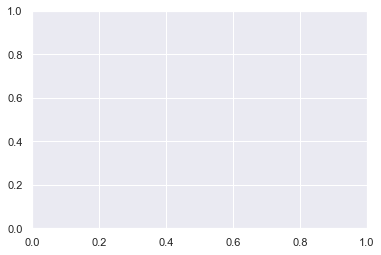

In [355]:
for i in range(len(matches)):

    match = matches[i]

    for d0, d1 in zip(datas, datas_op):

        for k in d0.keys():

            new_data = {'Huskies':d0[k][i], 'Opponent':d1[k][i]}
            sns_lp = sns.lineplot(data=pd.DataFrame(new_data))
            plt.title(k)
            f = sns_lp.get_figure()
            f.savefig('./results/task5/{}-{}.png'.format(match, k))
            plt.cla()